In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [3]:
company=pd.read_csv('D:\dinesh document\EXCELR\Data Science\Assingment\Decision Tree\Company_Data.csv')

### EDA

In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### Visualization

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

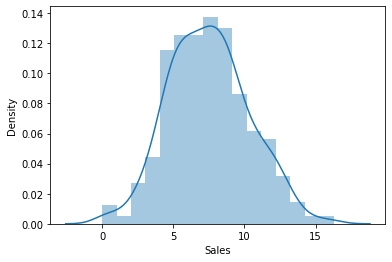

In [8]:
sns.distplot(company['Sales'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

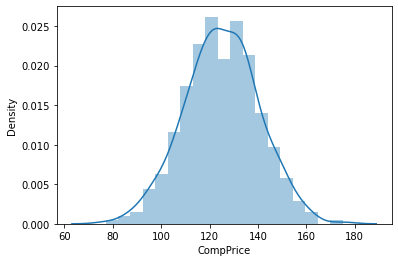

In [9]:
sns.distplot(company['CompPrice'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

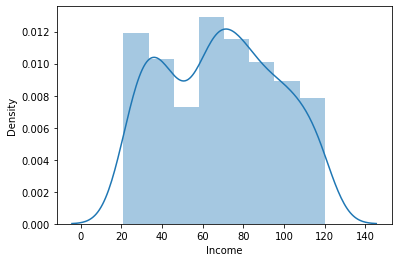

In [10]:
sns.distplot(company['Income'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Advertising', ylabel='Density'>

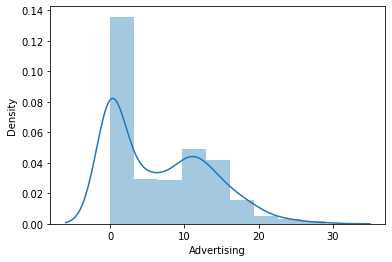

In [11]:
sns.distplot(company['Advertising'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

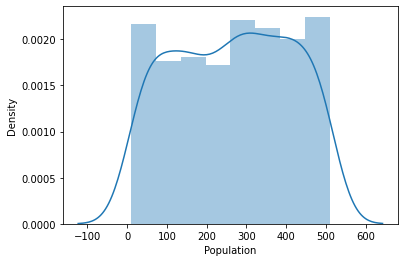

In [12]:
sns.distplot(company['Population'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

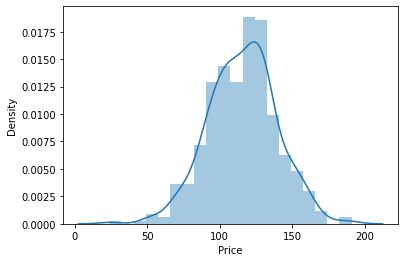

In [13]:
sns.distplot(company['Price'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

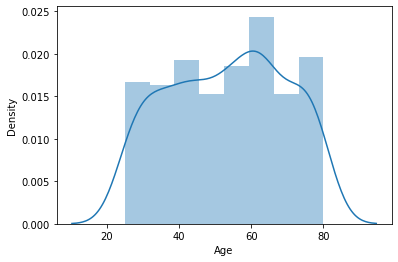

In [14]:
sns.distplot(company['Age'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Education', ylabel='Density'>

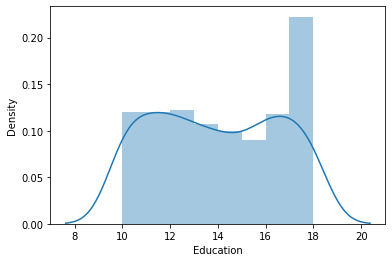

In [15]:
sns.distplot(company['Education'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Urban', ylabel='count'>

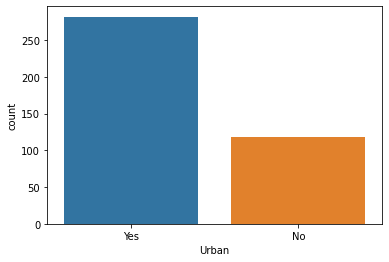

In [16]:
sns.countplot(company['Urban'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='US', ylabel='count'>

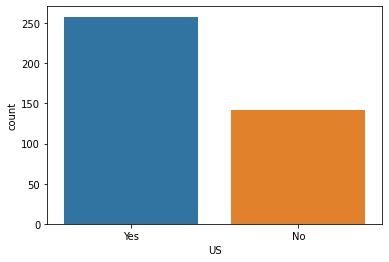

In [17]:
sns.countplot(company['US'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

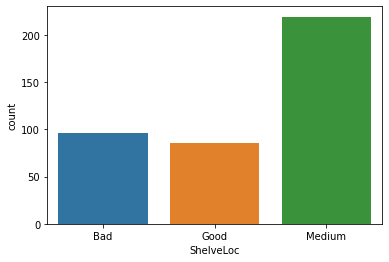

In [18]:
sns.countplot(company['ShelveLoc'])

<AxesSubplot:>

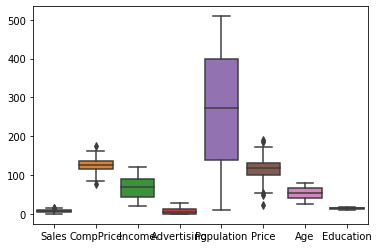

In [19]:
sns.boxplot(data=company)

<AxesSubplot:xlabel='CompPrice'>

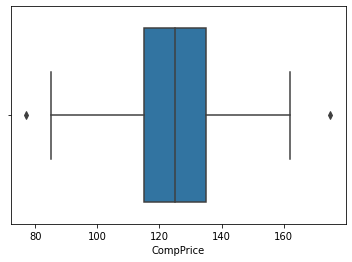

In [20]:
sns.boxplot(x=company['CompPrice'])

In [21]:
out_indx1 = np.where(company['CompPrice']>170)
out_indx1[0]

array([310], dtype=int64)

In [22]:
out_indx2 = np.where(company['CompPrice']<80)
out_indx2[0]

array([42], dtype=int64)

<AxesSubplot:xlabel='Sales'>

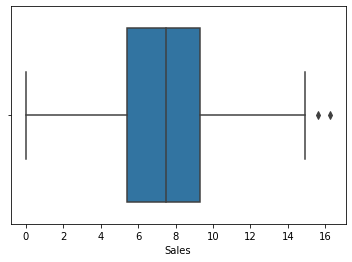

In [23]:
sns.boxplot(x=company['Sales'])

In [24]:
out_indx3 = np.where(company['Sales']>15)
out_indx3[0]

array([316, 376], dtype=int64)

<AxesSubplot:xlabel='Price'>

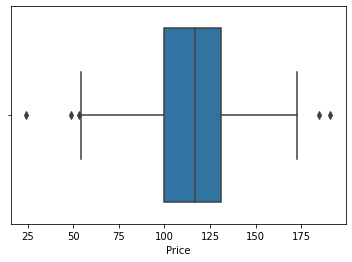

In [25]:
sns.boxplot(x=company['Price'])

In [26]:
out_indx4 = np.where(company['Price']>180)
out_indx4[0]

array([165, 174], dtype=int64)

In [27]:
out_indx5 = np.where(company['Price']<54)
out_indx5[0]

array([ 42, 125, 367], dtype=int64)

In [28]:
out_indx6=np.concatenate((out_indx4[0],out_indx5[0],out_indx3[0],out_indx2[0],out_indx1[0]))
out_indx6

array([165, 174,  42, 125, 367, 316, 376,  42, 310], dtype=int64)

In [29]:
company.drop(out_indx6,inplace=True)

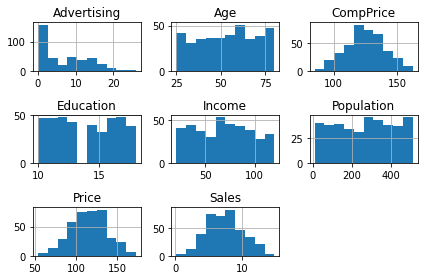

In [30]:
company.hist()
plt.tight_layout()
plt.show()

<AxesSubplot:>

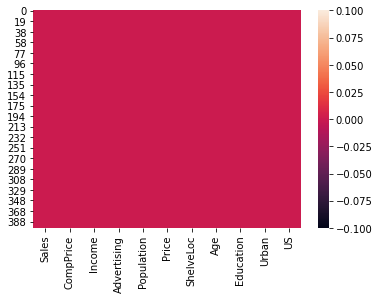

In [31]:
sns.heatmap(company.isnull())

### Scatter plot and Correletion analysis

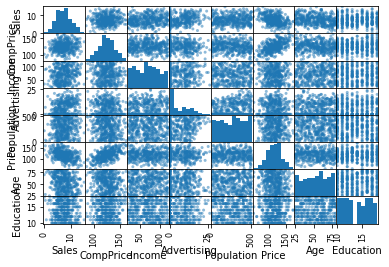

In [32]:
pd.plotting.scatter_matrix(company)
plt.show()

In [33]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.099711,0.150031,0.274870,0.045986,-0.406586,-0.230352,-0.040283
CompPrice,0.099711,1.000000,-0.069231,-0.078344,-0.124019,0.554955,-0.108305,0.054256
Income,0.150031,-0.069231,1.000000,0.063070,-0.003051,-0.039406,-0.002911,-0.065759
Advertising,0.274870,-0.078344,0.063070,1.000000,0.259886,0.015202,-0.000528,-0.014843
Population,0.045986,-0.124019,-0.003051,0.259886,1.000000,-0.032125,-0.049759,-0.094898
Price,-0.406586,0.554955,-0.039406,0.015202,-0.032125,1.000000,-0.124979,0.027913
Age,-0.230352,-0.108305,-0.002911,-0.000528,-0.049759,-0.124979,1.000000,0.002455
Education,-0.040283,0.054256,-0.065759,-0.014843,-0.094898,0.027913,0.002455,1.000000


In [34]:
company['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [35]:
company['US'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
oe=OrdinalEncoder()

In [37]:
company['Urban']=oe.fit_transform(company[['Urban']])

In [38]:
company['ShelveLoc']=oe.fit_transform(company[['ShelveLoc']])

In [39]:
company['US']=oe.fit_transform(company[['US']])

In [40]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0


In [41]:
X=company.iloc[:,1:11]
Y=company['Sales']

In [42]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0.0,42,17,1.0,1.0
1,111,48,16,260,83,1.0,65,10,1.0,1.0
2,113,35,10,269,80,2.0,59,12,1.0,1.0
3,117,100,4,466,97,2.0,55,14,1.0,1.0
4,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,33,14,1.0,1.0
396,139,23,3,37,120,2.0,55,11,0.0,1.0
397,162,26,12,368,159,2.0,40,18,1.0,1.0
398,100,79,7,284,95,0.0,50,12,1.0,1.0


In [43]:
Y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 392, dtype: float64

### Building Decision Tree Classifier using Entropy Criteria

In [44]:
Y_cat=pd.cut(Y,bins=[0,9,18],labels=['Low_sale','High_sale'])

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,Y_cat,test_size=0.2,random_state=40)

In [46]:
y_train.value_counts()

Low_sale     228
High_sale     85
Name: Sales, dtype: int64

In [47]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

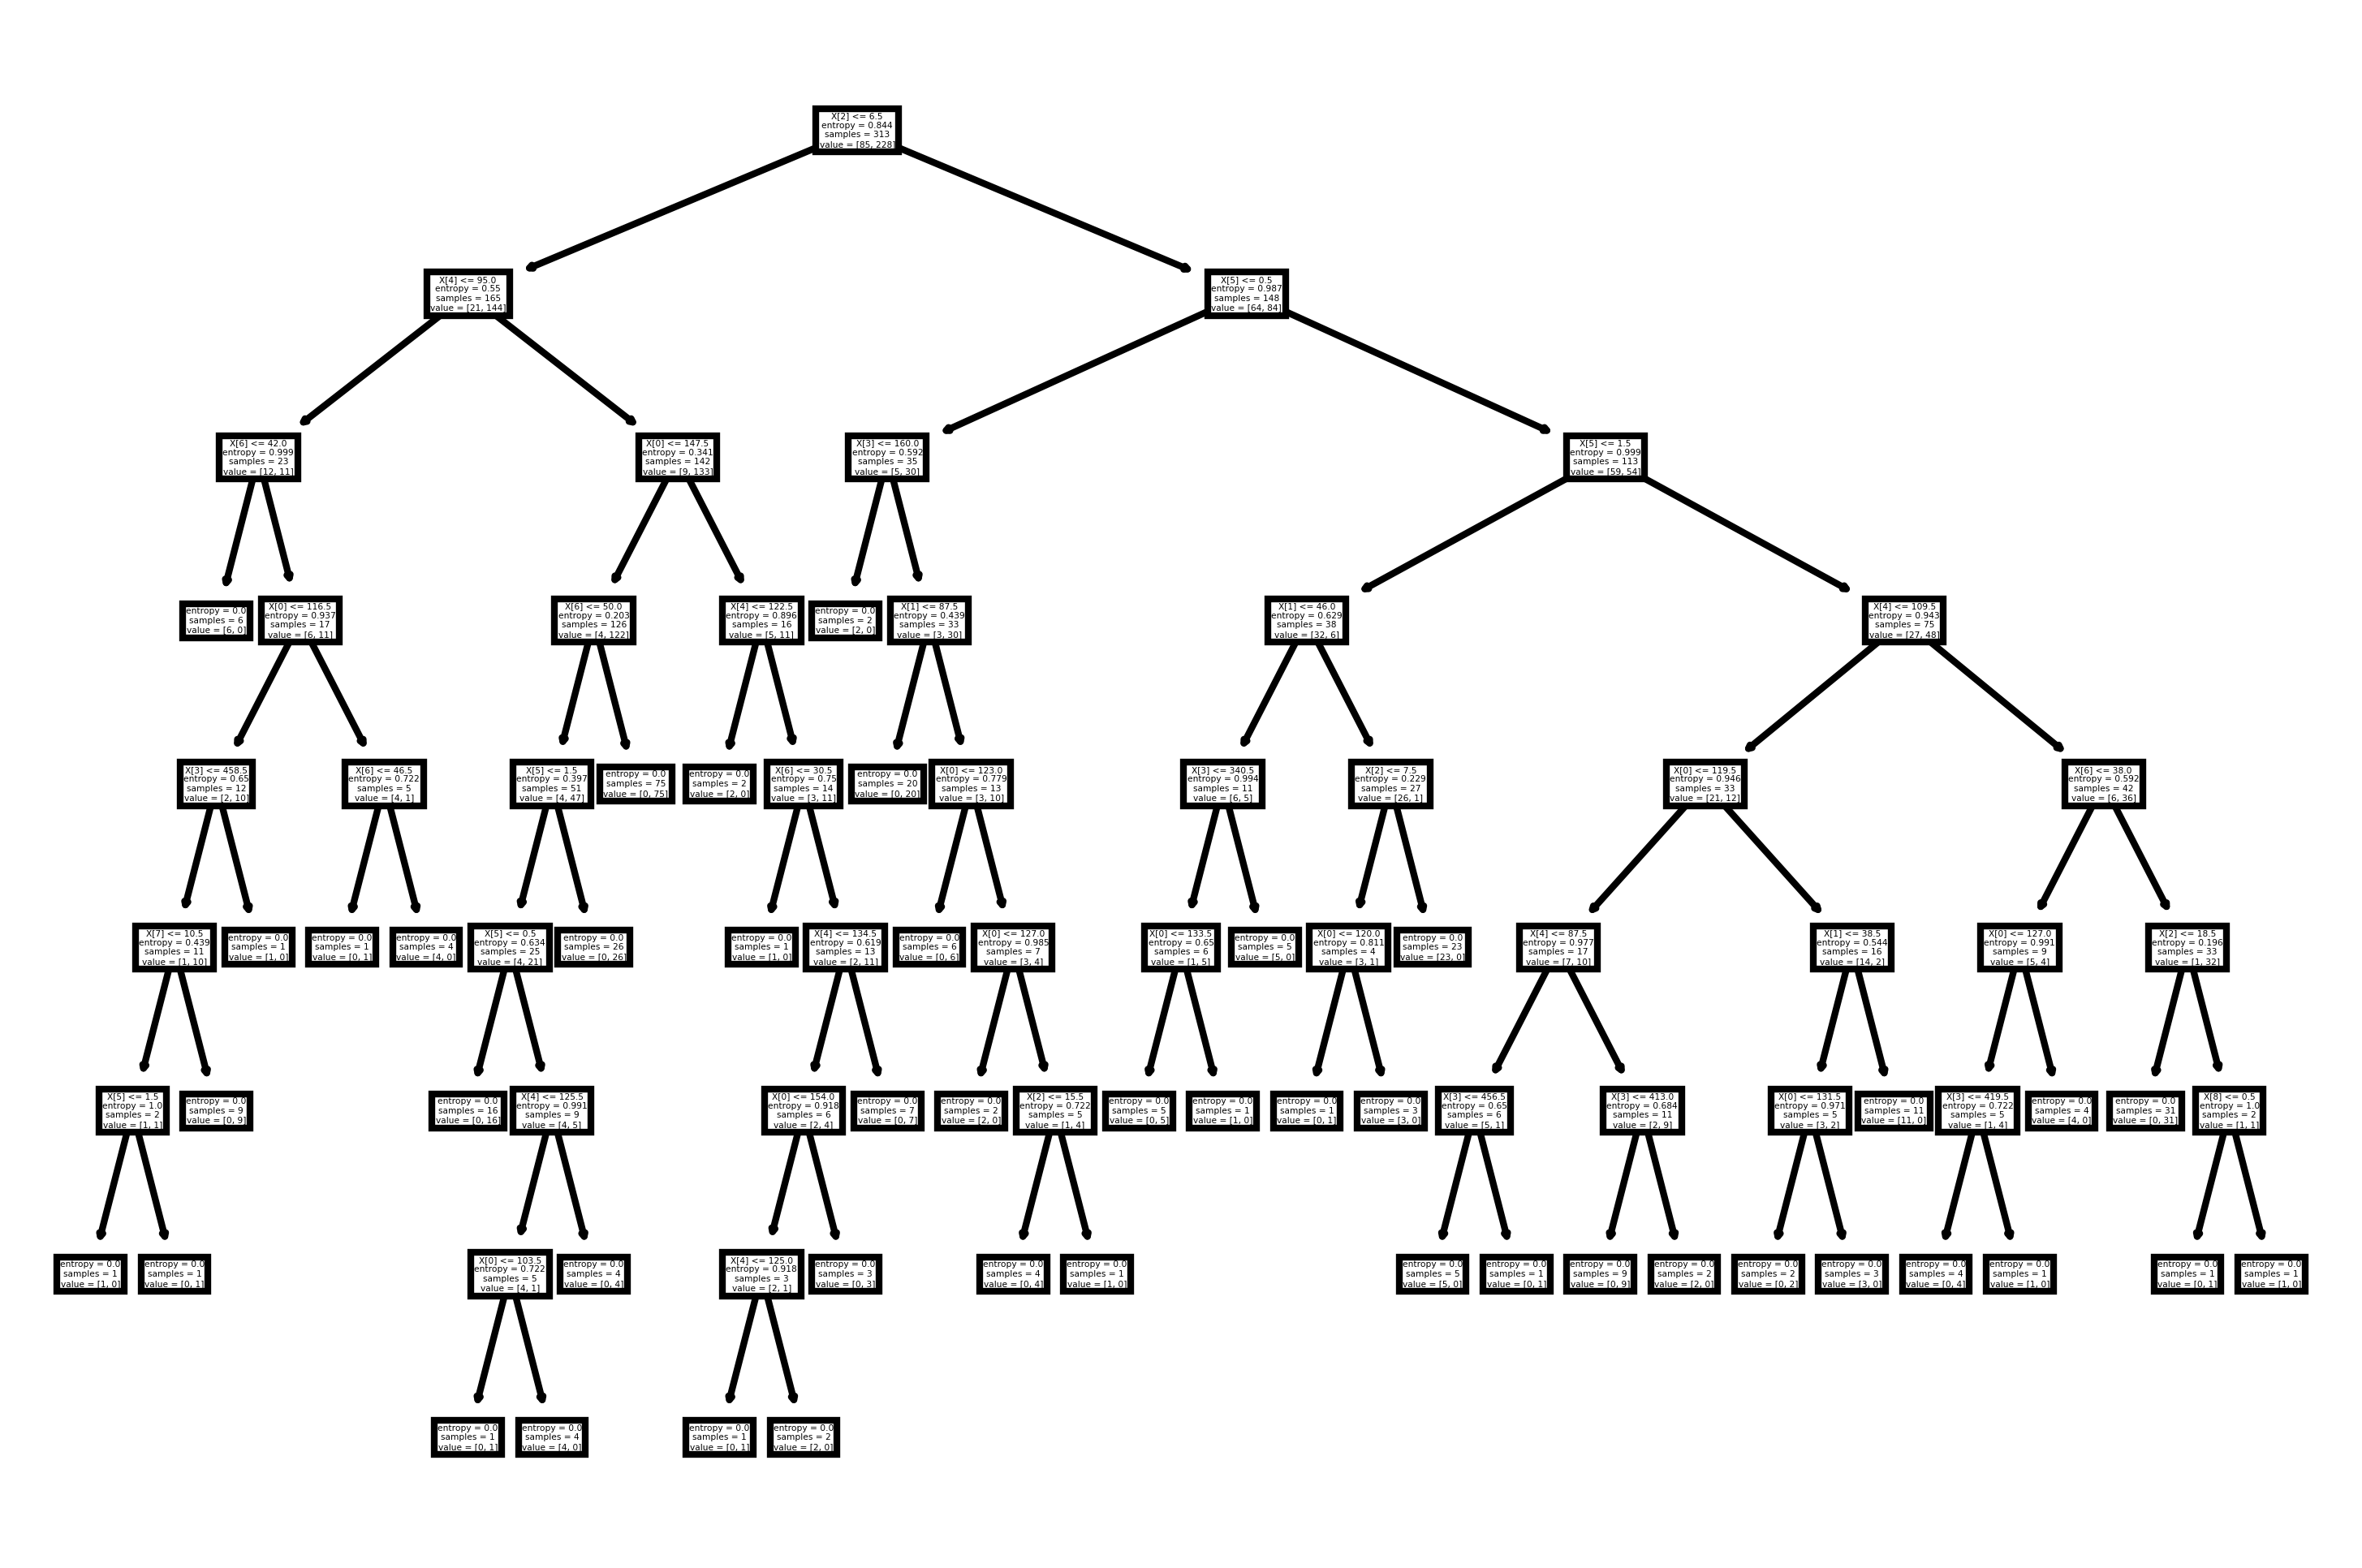

In [48]:
#PLot the decision tree
plt.figure(dpi=600)
tree.plot_tree(model);

In [49]:
preds = model.predict(x_test)
preds

array(['Low_sale', 'Low_sale', 'High_sale', 'High_sale', 'High_sale',
       'High_sale', 'High_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'High_sale', 'High_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'High_sale', 'Low_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_

In [50]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

   High_sale       0.41      0.50      0.45        22
    Low_sale       0.79      0.72      0.75        57

    accuracy                           0.66        79
   macro avg       0.60      0.61      0.60        79
weighted avg       0.68      0.66      0.67        79



In [51]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [52]:
accuracy_score(y_test,preds)

0.6582278481012658

In [53]:
precision_score(y_test,preds,average='weighted')

0.682345198167983

In [54]:
recall_score(y_test,preds,average='weighted')

0.6582278481012658

In [55]:
f1_score(y_test,preds,average='weighted')

0.6678263919666113

In [56]:
model_new=DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_split=5)
model_new.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5)

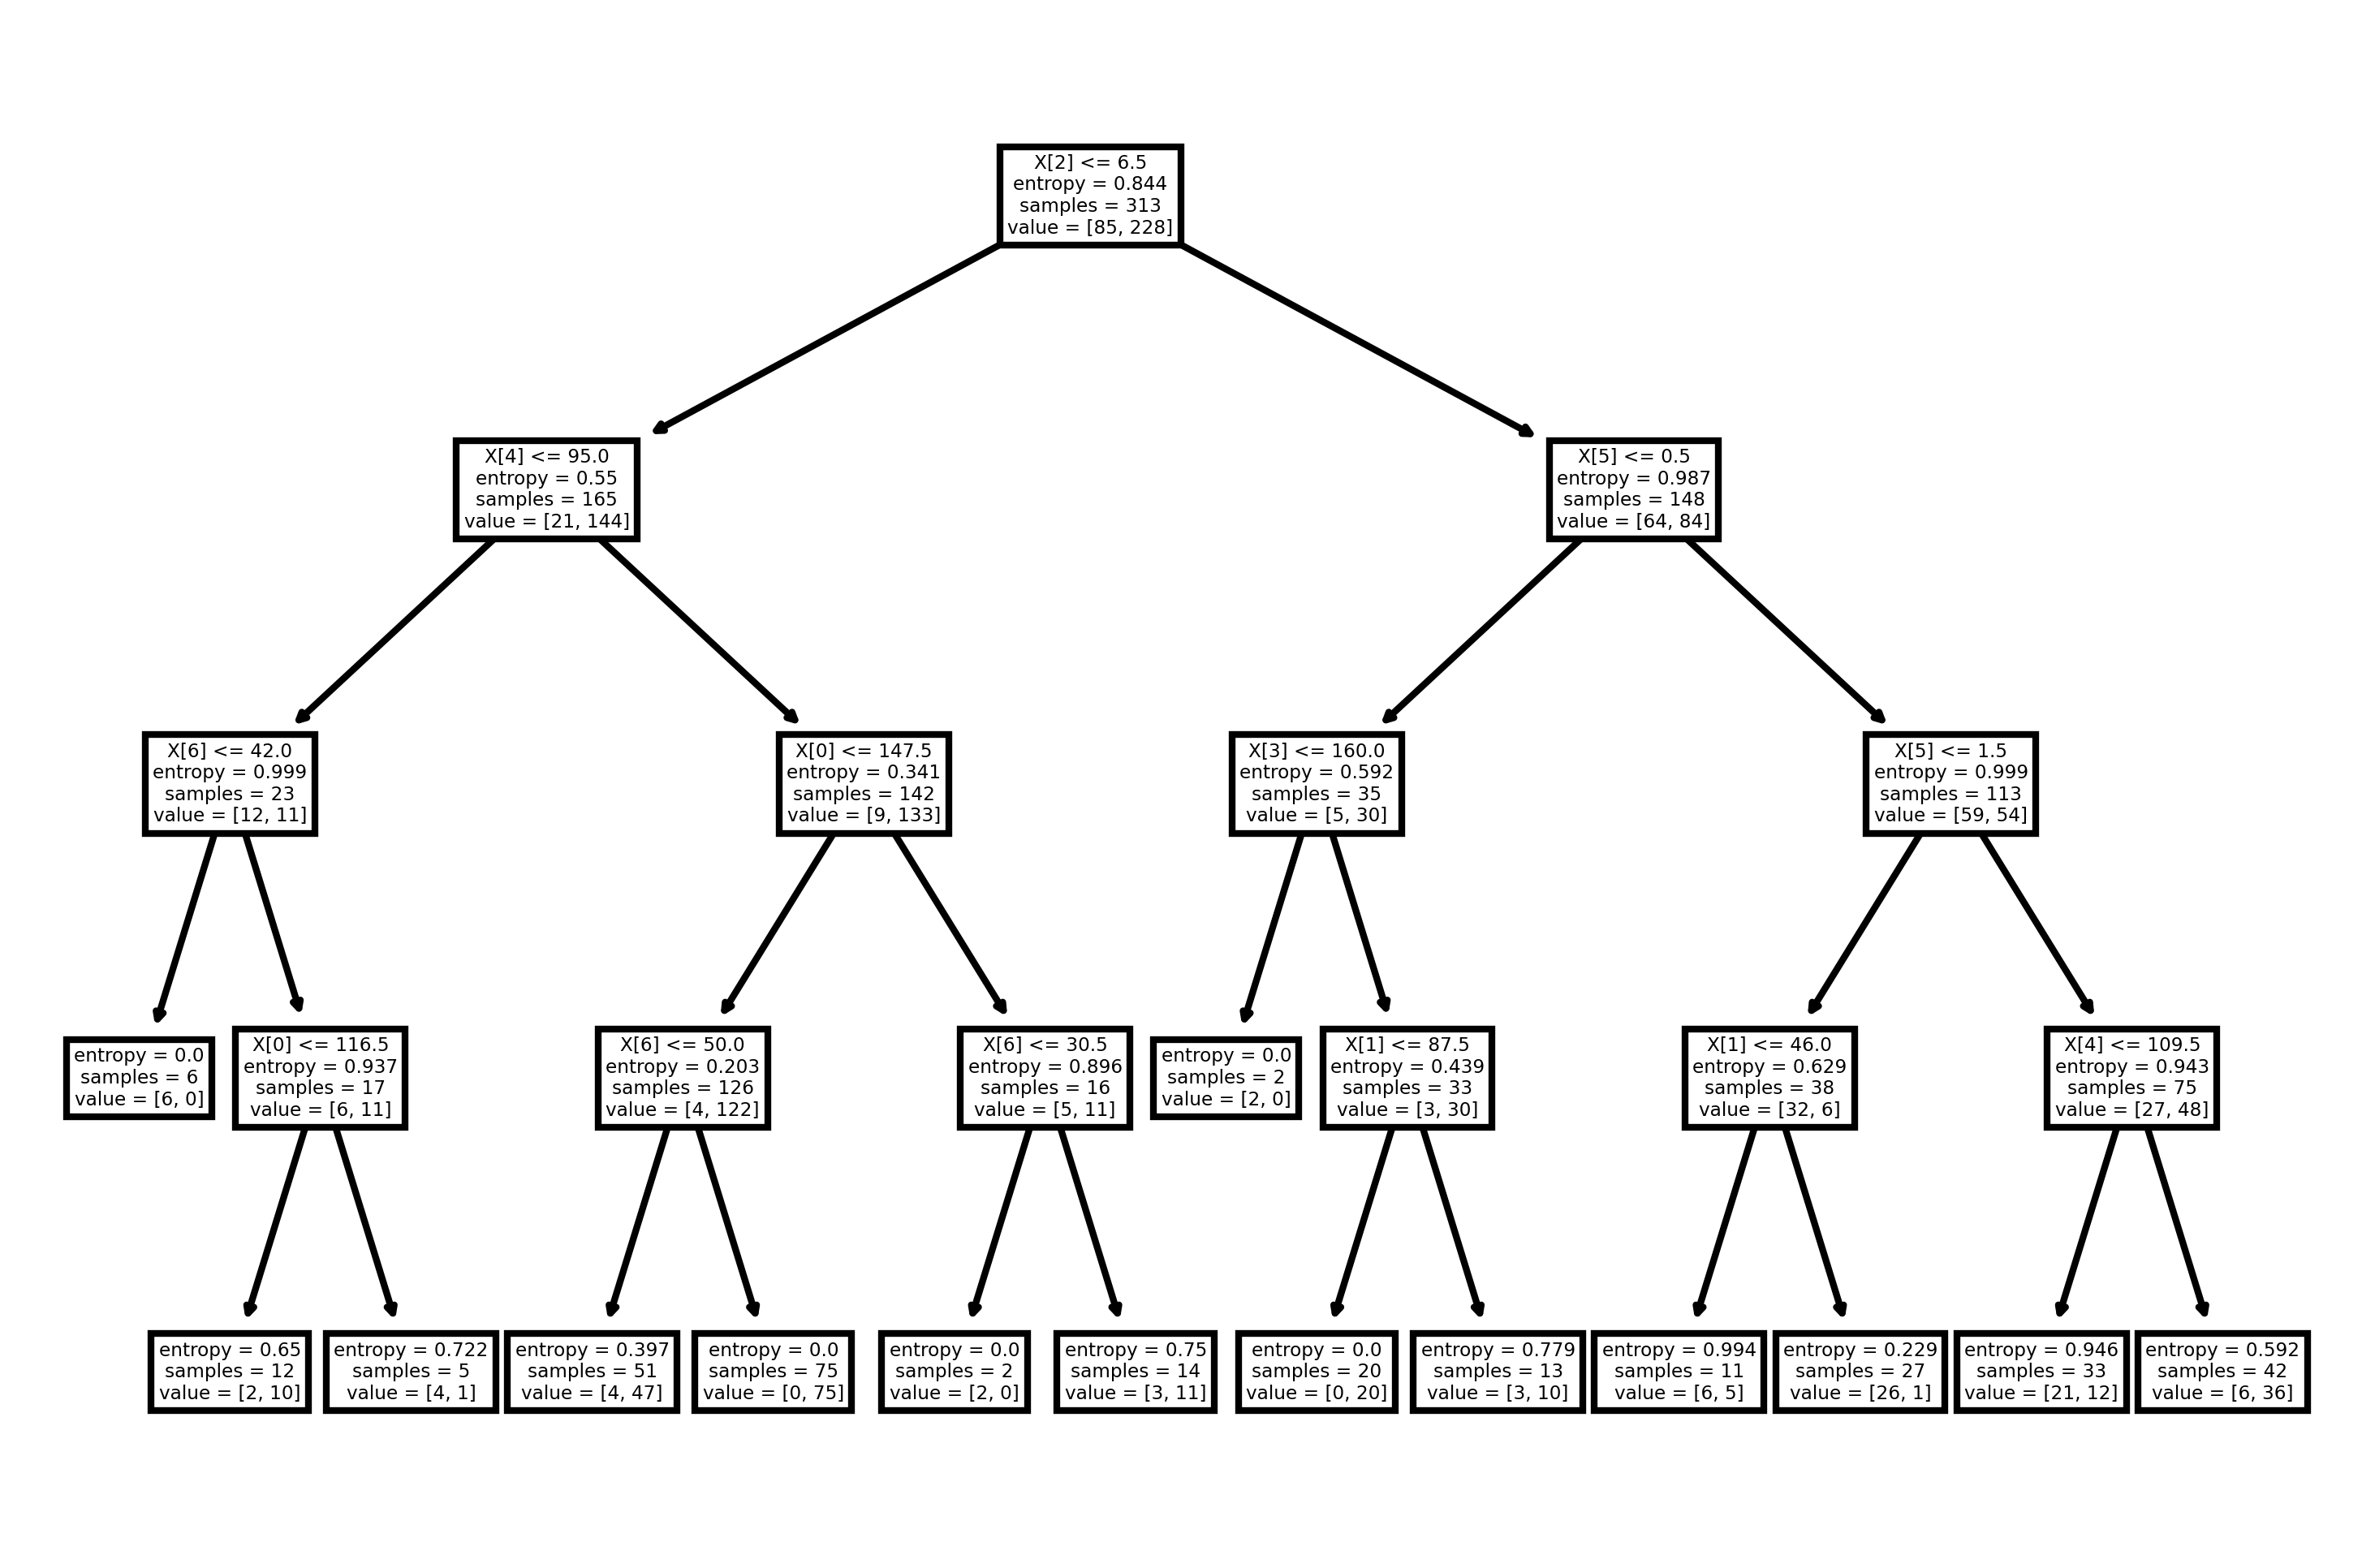

In [57]:
#PLot the decision tree
plt.figure(dpi=600)
tree.plot_tree(model_new);

In [104]:
preds_trainy_1 = model_new.predict(x_train)
preds_trainy_1

array(['Low_sale', 'High_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'High_sale', 'High_sale', 'Low_sale', 'High_sale',
       'High_sale', 'High_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'High_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'High_sale', 'High_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'Low

In [105]:
print(classification_report(y_train,preds_trainy_1))

              precision    recall  f1-score   support

   High_sale       0.78      0.79      0.78        85
    Low_sale       0.92      0.92      0.92       228

    accuracy                           0.88       313
   macro avg       0.85      0.85      0.85       313
weighted avg       0.88      0.88      0.88       313



In [58]:
preds1 = model_new.predict(x_test)
preds1

array(['Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'High_sale', 'High_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'High_sale', 'Low_sale', 'High_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'High_sale', 'Low_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_s

In [59]:
print(classification_report(y_test,preds1))

              precision    recall  f1-score   support

   High_sale       0.50      0.59      0.54        22
    Low_sale       0.83      0.77      0.80        57

    accuracy                           0.72        79
   macro avg       0.67      0.68      0.67        79
weighted avg       0.74      0.72      0.73        79



### data balancing

In [60]:
company['Sales_cat'] = Y_cat

In [61]:
company.shape

(392, 12)

In [62]:
data_low_sale = company.loc[company["Sales_cat"]=='Low_sale']
print(data_low_sale.shape)


(285, 12)


In [63]:
data_High_sale = company.loc[company["Sales_cat"]=='High_sale']
print(data_High_sale.shape)

(107, 12)


In [64]:
data_low_sale_sample = data_low_sale.sample(n = 107, replace = False)

In [65]:
data_low_sale_sample

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
324,2.66,136,65,4,133,150,0.0,53,13,1.0,1.0,Low_sale
277,7.80,136,48,12,326,125,2.0,36,16,1.0,1.0,Low_sale
127,6.52,125,48,3,192,116,2.0,51,14,1.0,1.0,Low_sale
26,8.33,107,115,11,496,131,1.0,50,11,0.0,1.0,Low_sale
19,8.73,129,76,16,58,121,2.0,69,12,1.0,1.0,Low_sale
...,...,...,...,...,...,...,...,...,...,...,...,...
83,4.42,109,36,7,468,94,0.0,56,11,1.0,1.0,Low_sale
109,8.98,115,65,0,217,90,2.0,60,17,0.0,0.0,Low_sale
123,8.19,127,103,0,125,155,1.0,29,15,0.0,1.0,Low_sale
317,6.41,142,30,0,472,136,1.0,80,15,0.0,0.0,Low_sale


In [66]:
data_balance = pd.concat([data_low_sale_sample, data_High_sale], ignore_index=True)
data_balance = data_balance.sample(n=len(data_balance), replace=False)

In [67]:
data_balance

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
35,7.49,136,119,6,178,145,2.0,35,13,1.0,1.0,Low_sale
4,8.73,129,76,16,58,121,2.0,69,12,1.0,1.0,Low_sale
49,8.43,138,80,0,108,126,1.0,70,13,0.0,1.0,Low_sale
77,4.55,111,56,0,504,110,2.0,62,16,1.0,0.0,Low_sale
199,10.44,124,115,16,458,105,2.0,62,16,0.0,1.0,High_sale
...,...,...,...,...,...,...,...,...,...,...,...,...
151,12.49,93,106,12,416,55,2.0,75,15,1.0,1.0,High_sale
94,6.44,96,94,14,384,120,2.0,36,18,0.0,1.0,Low_sale
162,10.62,116,79,19,359,116,1.0,58,17,1.0,1.0,High_sale
186,11.93,123,98,12,408,134,1.0,29,10,1.0,1.0,High_sale


In [68]:
X1=data_balance.iloc[:,2:11]
Y1=data_balance['Sales_cat']

In [69]:
X1

,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
35,119,6,178,145,2.0,35,13,1.0,1.0
4,76,16,58,121,2.0,69,12,1.0,1.0
49,80,0,108,126,1.0,70,13,0.0,1.0
77,56,0,504,110,2.0,62,16,1.0,0.0
199,115,16,458,105,2.0,62,16,0.0,1.0
...,...,...,...,...,...,...,...,...,...
151,106,12,416,55,2.0,75,15,1.0,1.0
94,94,14,384,120,2.0,36,18,0.0,1.0
162,79,19,359,116,1.0,58,17,1.0,1.0
186,98,12,408,134,1.0,29,10,1.0,1.0


In [70]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,Y1,test_size=0.2,random_state=40)

In [71]:
model_balance=DecisionTreeClassifier(criterion='entropy')
model_balance.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy')

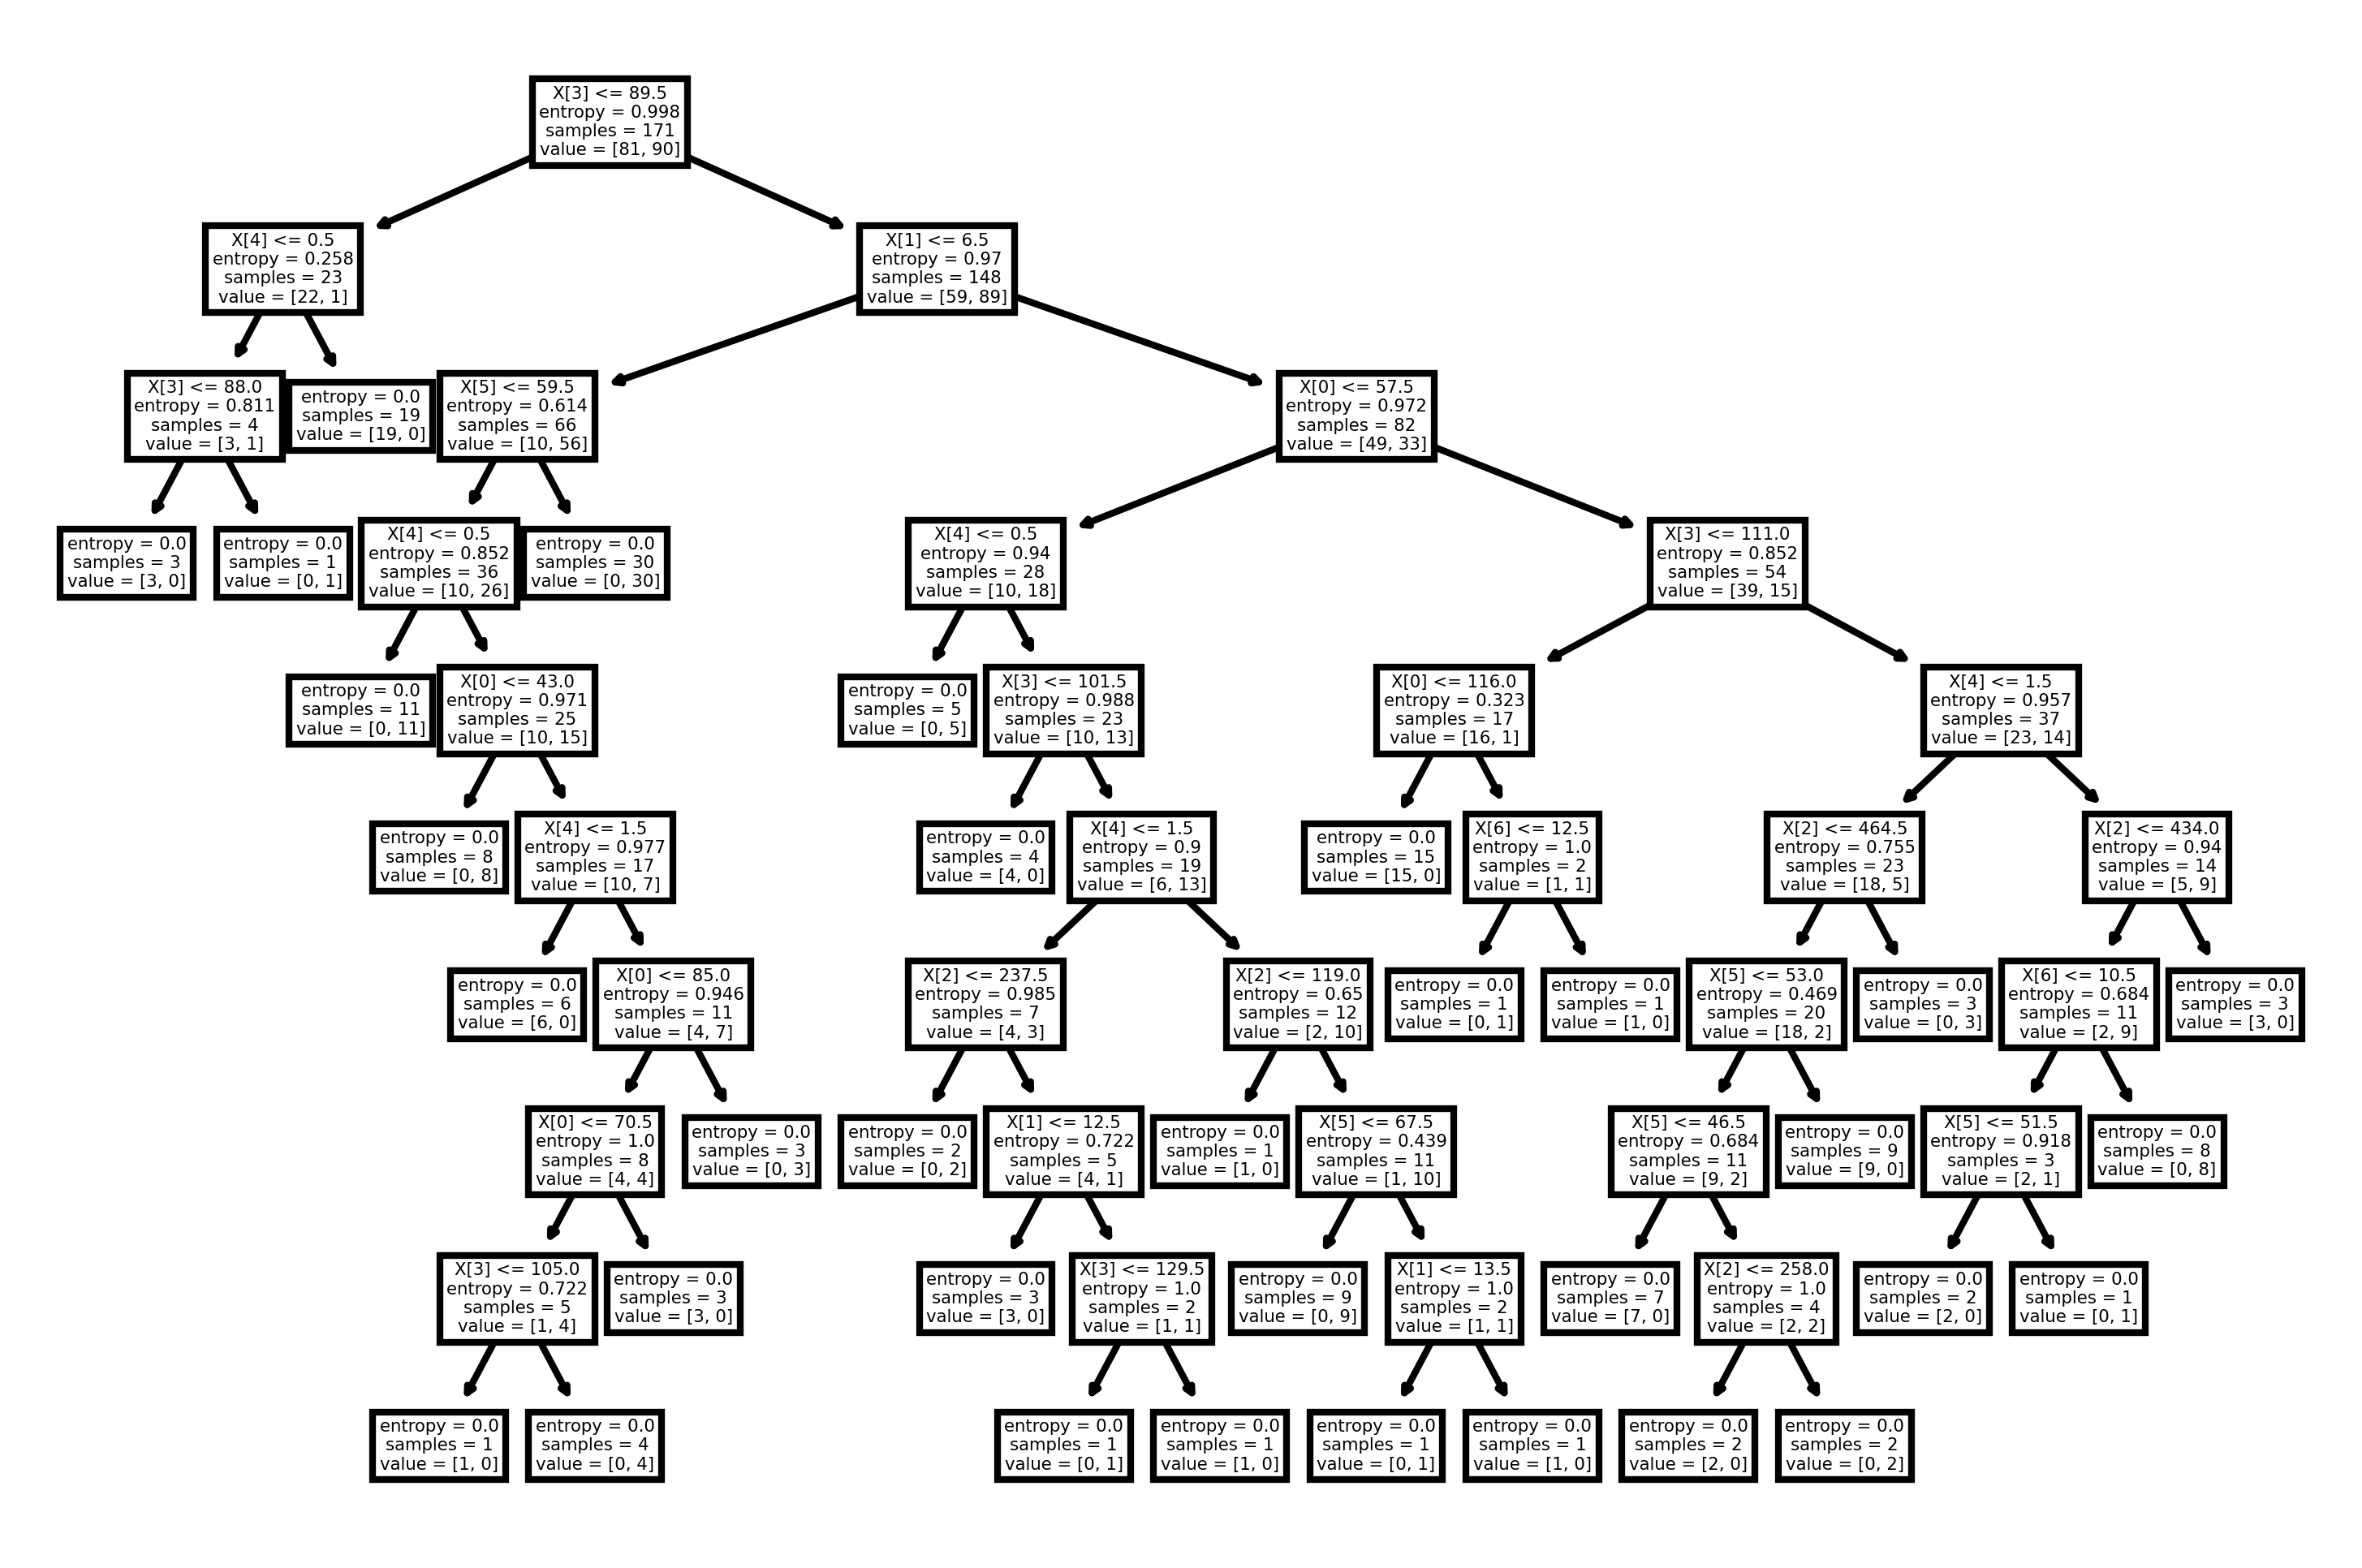

In [72]:
plt.figure(dpi=600)
tree.plot_tree(model_balance);

In [73]:
preds2 = model_balance.predict(x_test1)
preds2

array(['High_sale', 'High_sale', 'High_sale', 'High_sale', 'High_sale',
       'High_sale', 'High_sale', 'High_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'High_sale', 'High_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'High_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'High_sale', 'High_sale',
       'Low_sale', 'High_sale', 'High_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_sale'], dtype=object)

In [74]:
print(classification_report(y_test1,preds2))

              precision    recall  f1-score   support

   High_sale       0.75      0.69      0.72        26
    Low_sale       0.58      0.65      0.61        17

    accuracy                           0.67        43
   macro avg       0.66      0.67      0.67        43
weighted avg       0.68      0.67      0.68        43



In [75]:
model_balance1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=5,max_features="sqrt")
model_balance1.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_split=5)

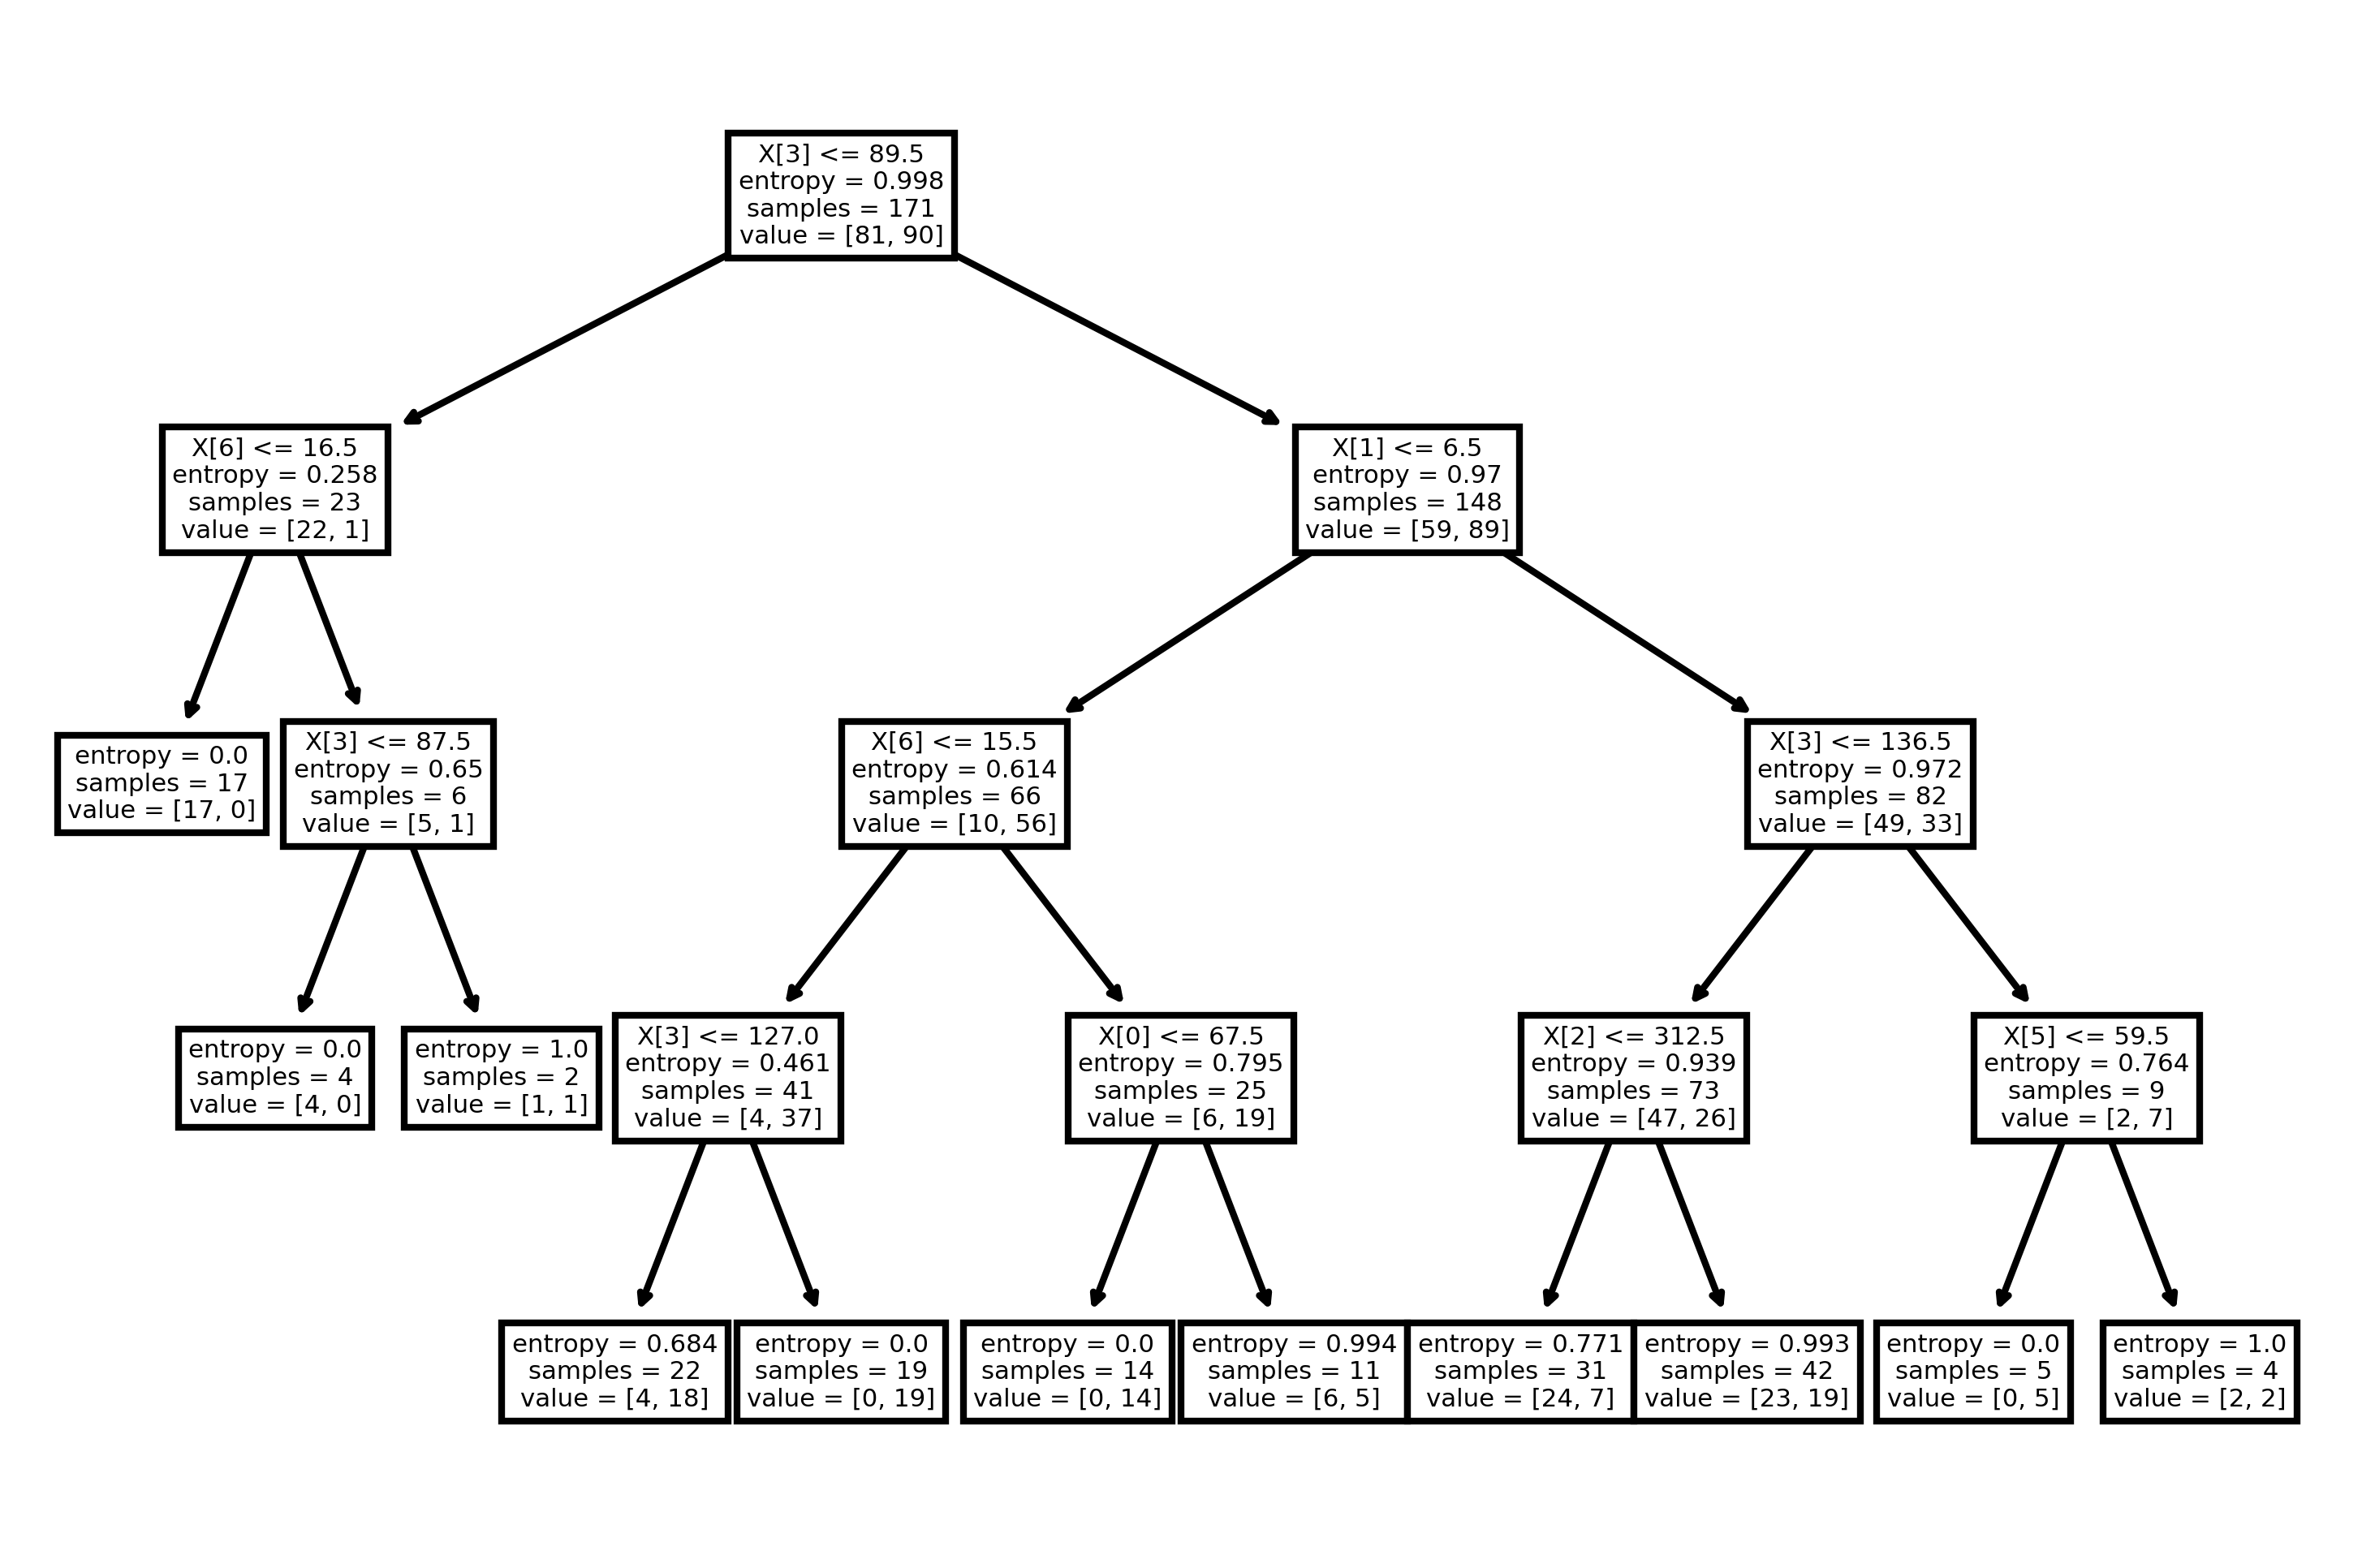

In [76]:
plt.figure(dpi=600)
tree.plot_tree(model_balance1);

In [77]:
preds3 = model_balance1.predict(x_test1)
preds3

array(['Low_sale', 'High_sale', 'High_sale', 'High_sale', 'High_sale',
       'High_sale', 'High_sale', 'High_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'High_sale', 'High_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'High_sale', 'High_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'High_sale', 'High_sale',
       'Low_sale', 'High_sale', 'High_sale', 'Low_sale', 'High_sale',
       'High_sale', 'High_sale', 'High_sale'], dtype=object)

In [78]:
print(classification_report(y_test1,preds3))

              precision    recall  f1-score   support

   High_sale       0.74      0.77      0.75        26
    Low_sale       0.62      0.59      0.61        17

    accuracy                           0.70        43
   macro avg       0.68      0.68      0.68        43
weighted avg       0.69      0.70      0.70        43



### SMOTE for balancing Data

In [79]:
#!pip install imbalanced-learn

In [80]:
import imblearn
print(imblearn.__version__)

0.10.1


In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
# transform the dataset
smt = SMOTE()
smote_x, smote_y = smt.fit_resample(x_train, y_train)

In [83]:
smote_y.value_counts()

High_sale    228
Low_sale     228
Name: Sales, dtype: int64

### SMOTE model building 

In [84]:
model_smote=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=5,max_features="sqrt")
model_smote.fit(smote_x,smote_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_split=5)

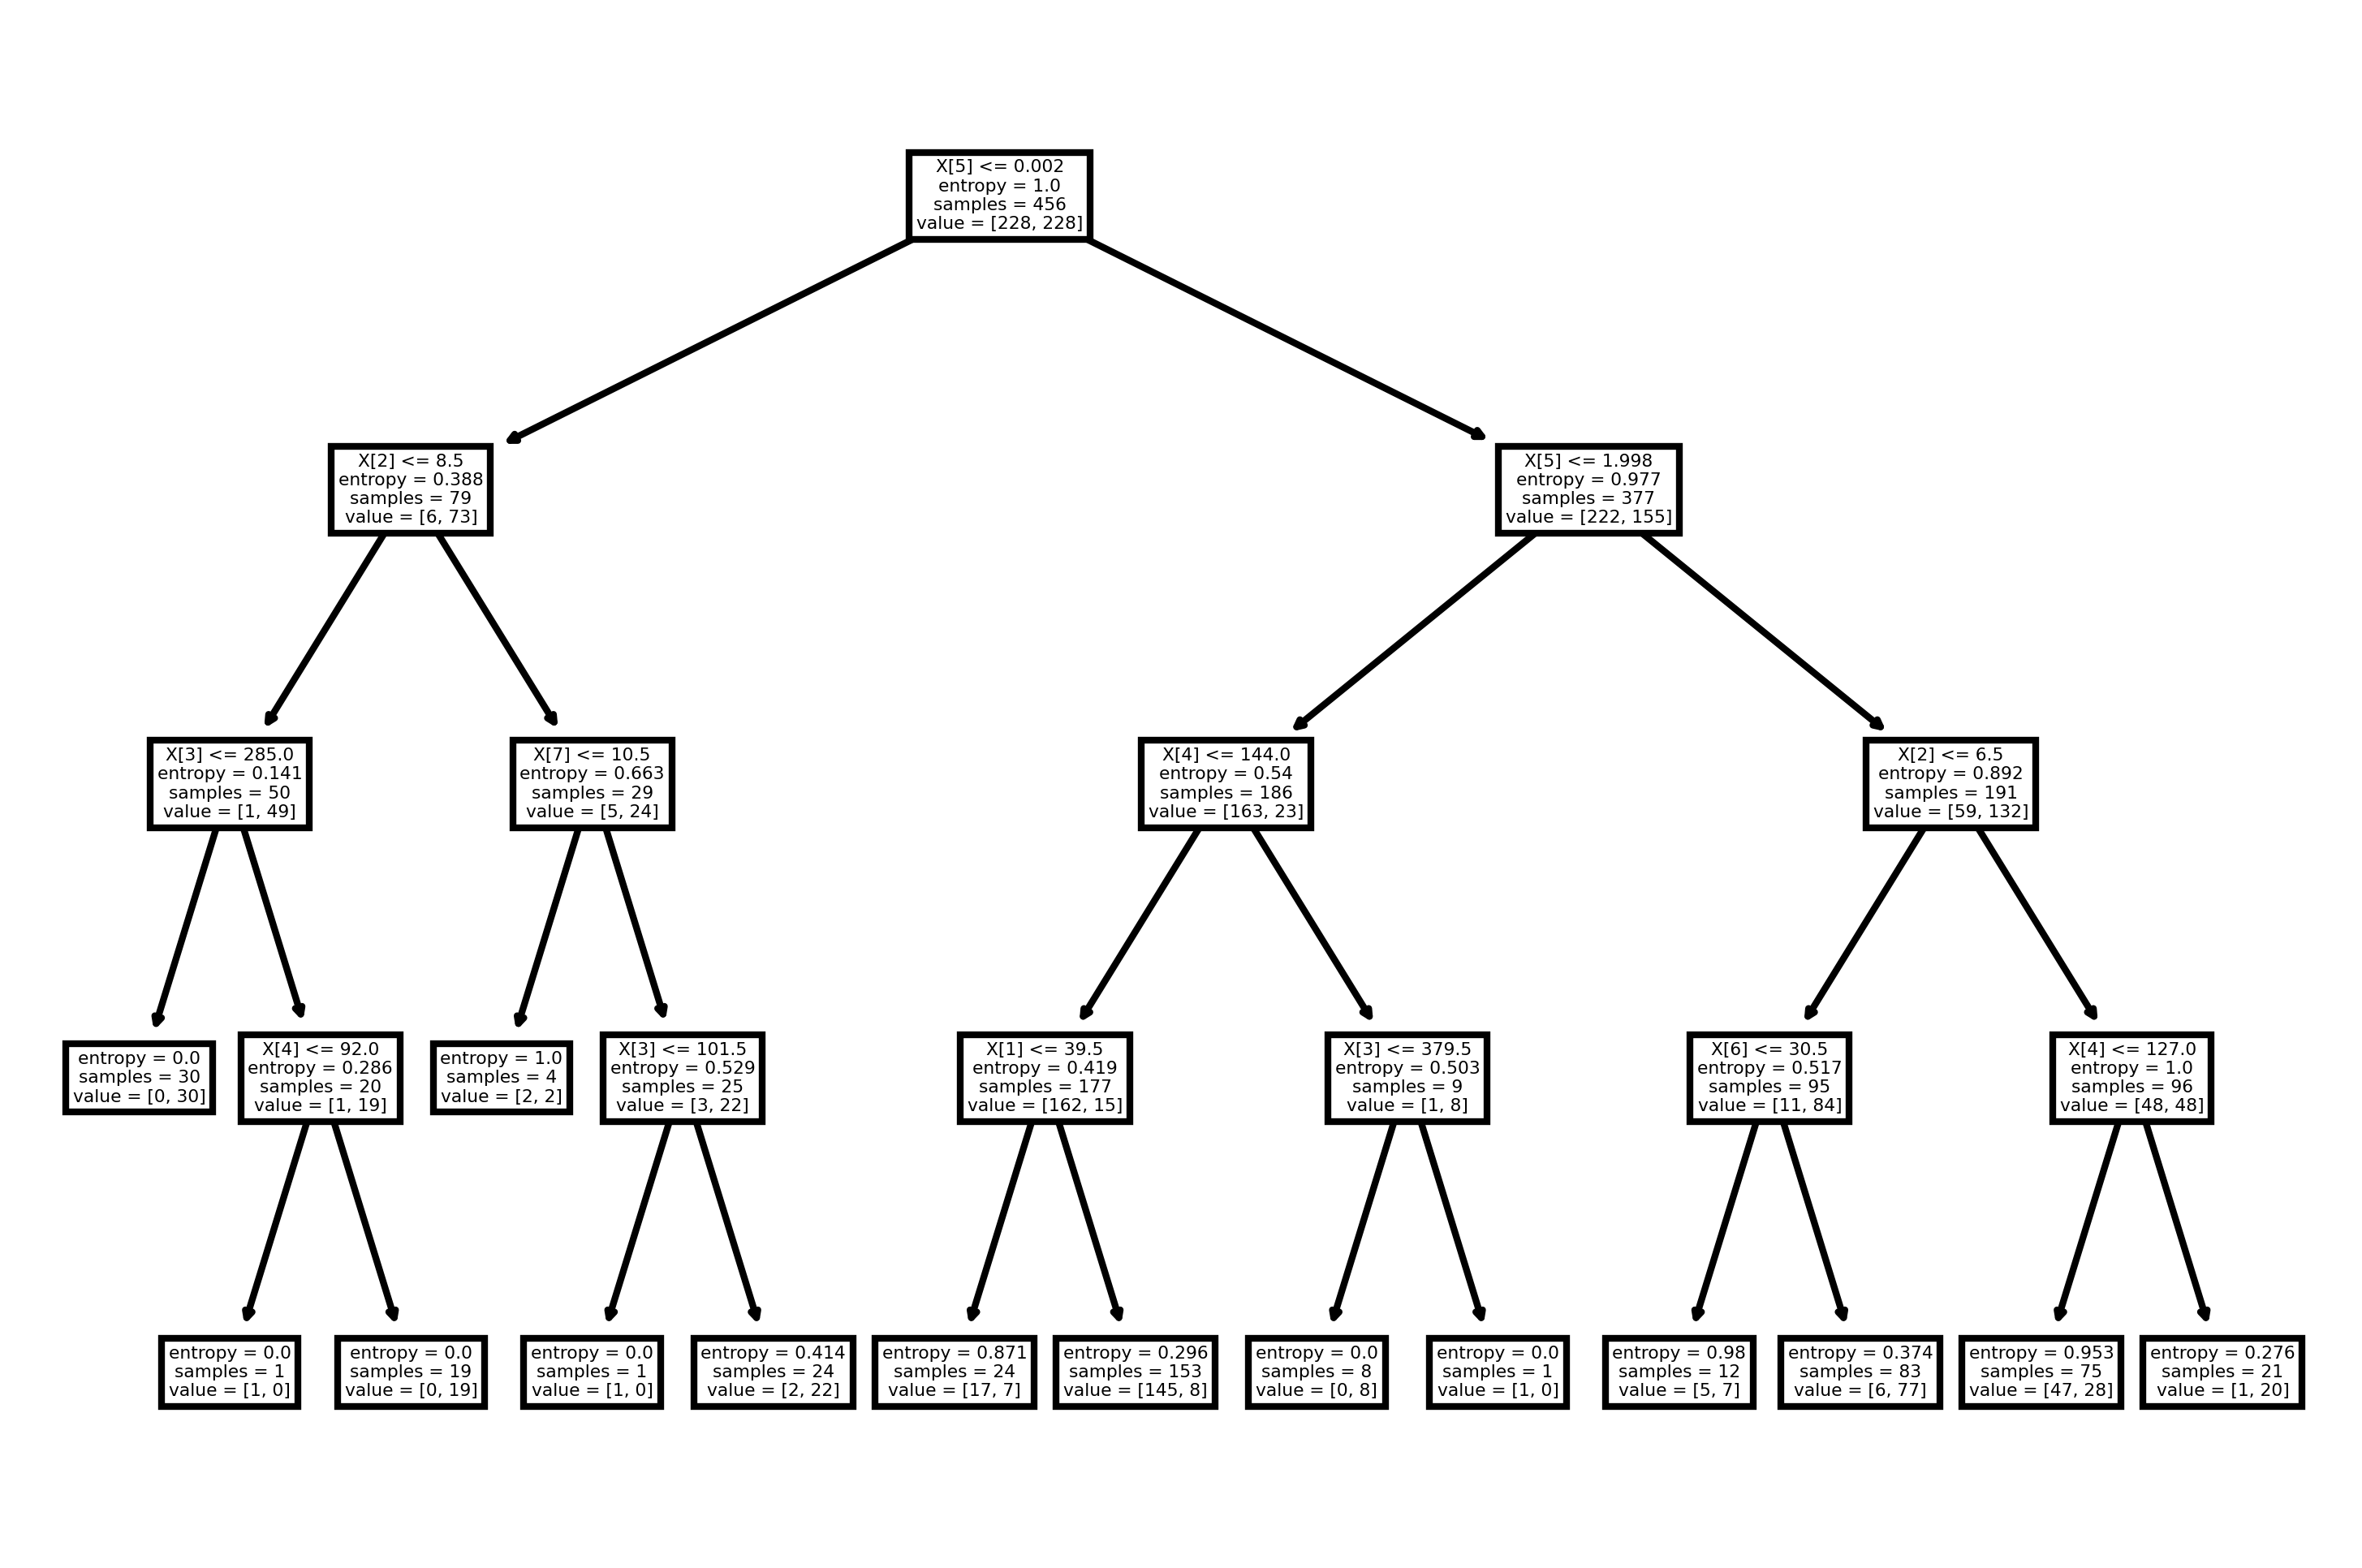

In [85]:
plt.figure(dpi=600)
tree.plot_tree(model_smote);

In [89]:
## prediction of training data
preds_smote_ytrain = model_smote.predict(x_train)
preds_smote_ytrain

array(['Low_sale', 'High_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'High_sale', 'Low_sale', 'High_sale', 'Low_sale', 'High_sale',
       'High_sale', 'High_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'High_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'High_sale', 'Low_sale',
       'High_sale', 'High_sale', 'High_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'High_sale', 'High_sale', 'High_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'H

In [91]:
print(classification_report(y_train,preds_smote_ytrain))

              precision    recall  f1-score   support

   High_sale       0.63      0.89      0.74        85
    Low_sale       0.95      0.80      0.87       228

    accuracy                           0.83       313
   macro avg       0.79      0.85      0.80       313
weighted avg       0.86      0.83      0.84       313



In [92]:
preds_smote = model_smote.predict(x_test)
preds_smote

array(['High_sale', 'Low_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'High_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'High_sale', 'Low_sale', 'High_sale', 'Low_sale',
       'High_sale', 'High_sale', 'High_sale', 'High_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'High_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'High_sale', 'Low_sale', 'Low_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'High_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'High_sale',
       'High_sale', 'Low_sale', 'High_sale', 'High_sale', 'High_sale',
       'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'Low_sale', 'Low_sale', 'Low_sale', 'Low_sale',
       'High_sale', 'High_sale', 'Low

In [93]:
print(classification_report(y_test,preds_smote))

              precision    recall  f1-score   support

   High_sale       0.59      0.73      0.65        22
    Low_sale       0.88      0.81      0.84        57

    accuracy                           0.78        79
   macro avg       0.74      0.77      0.75        79
weighted avg       0.80      0.78      0.79        79



### K Fold

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
new_model_smote=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=5,max_features="sqrt")

In [96]:
Y_cat

0      High_sale
1      High_sale
2      High_sale
3       Low_sale
4       Low_sale
         ...    
395    High_sale
396     Low_sale
397     Low_sale
398     Low_sale
399    High_sale
Name: Sales, Length: 392, dtype: category
Categories (2, object): [Low_sale < High_sale]

In [97]:
Accuracy_values=cross_val_score(new_model_smote,X,Y_cat,cv=10)
print('\nAccuracy values for 10-fold cross validation:\n',Accuracy_values)
print('n\Final Average Accuracy of the model:',round(Accuracy_values.mean(),2))


Accuracy values for 10-fold cross validation:
 [0.775      0.625      0.71794872 0.69230769 0.71794872 0.74358974
 0.76923077 0.71794872 0.79487179 0.79487179]
n\Final Average Accuracy of the model: 0.73


In [98]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

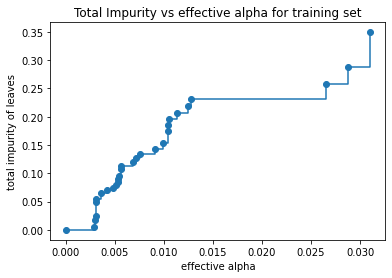

In [99]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [100]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.046423871282755214


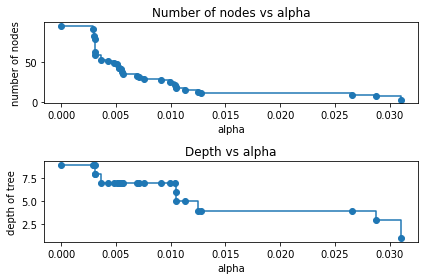

In [101]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

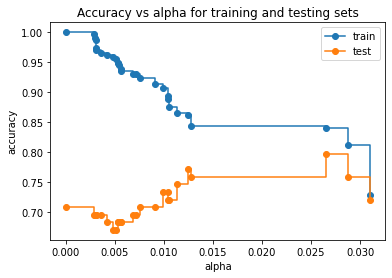

In [102]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [103]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(x_train, y_train))
print('Test accuracy of best model: ',best_model.score(x_test, y_test))

Training accuracy of best model:  0.8402555910543131
Test accuracy of best model:  0.7974683544303798


##### Overfitting is reduced after post_pruning because difference in training and testing accuracy is less as compared to  baseline model